In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

The duration is approximately: 0.4754754754754755. 


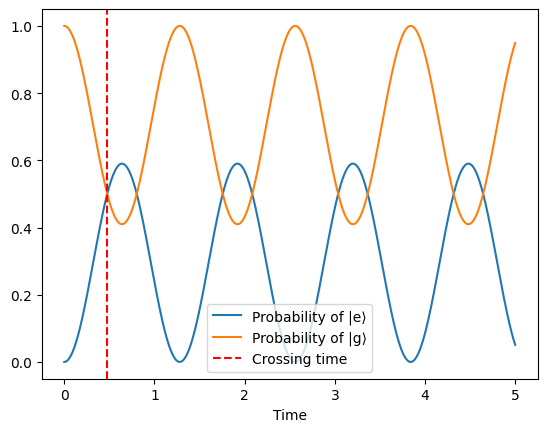

In [95]:
# Parameters
omega_q = 2 * np.pi * 1.0  # frequency of qubit
omega = 2 * np.pi * 0.9  # frequency of light
rabi = 2 * np.pi * 0.6

time_max = 5.0  
times = np.linspace(0, time_max, 1000)

# Define initial state
psi0 = basis(2, 1)  # |g⟩

# Define Hamiltonian
def Hamiltonian(phase):
    return 0.5 * omega_q * sigmaz() / 2 + 0.5 * rabi * (sigmap() * np.exp(-1j*phase) + sigmam() * np.exp(1j*phase))   

# 进行演化
result = mesolve(Hamiltonian(0), psi0, times, [], [])

prob_e = [abs(result.states[i][0][0][0])**2 for i in range(len(result.states))]
prob_g = [abs(result.states[i][1][0][0])**2 for i in range(len(result.states))]

# Solve the duration T for pi/2-pulse
# Find the time at which prob_e is closest to 0.5
crossing_indices = np.where(np.diff(np.sign(np.array(prob_e) - 0.5)))[0]
if len(crossing_indices) > 0:
    T = times[crossing_indices[0]]
    print(f"The duration is approximately: {T}. ")
else:
    T = None
    print("Cannot find the time-cross, please adjust the parameters. ")

# Plot the results
plt.plot(result.times, prob_e, label='Probability of |e⟩')
plt.plot(result.times, prob_g, label='Probability of |g⟩')
plt.xlabel("Time")
plt.axvline(x=T, color='r', linestyle='--', label='Crossing time')
plt.legend()
plt.show()


In [96]:
result1 = mesolve(Hamiltonian(0), psi0, np.linspace(0,T,100), [], [])
psi1 = result1.states[-1]

duration = 1
H0 =  0.5 * omega_q * sigmaz() / 2
result2 = mesolve(H0, psi1, np.linspace(0, duration, 100), [], [])
psi2 = result2.states[-1]

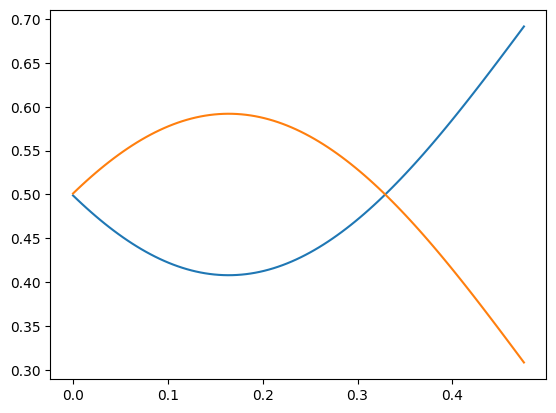

In [97]:
result3 = mesolve(Hamiltonian(0), psi2, np.linspace(0,T,100), [], [])
prob_e = [abs(result3.states[i][0][0][0])**2 for i in range(len(result3.states))]
prob_g = [abs(result3.states[i][1][0][0])**2 for i in range(len(result3.states))]

plt.plot(result3.times, prob_e, label='Probability of |e⟩')
plt.plot(result3.times, prob_g, label='Probability of |g⟩')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# 定义系统参数
omega = 1.0  # 能级之间的能量差

# 构建自由演化的哈密顿量
H_free = omega * sigmaz() / 2

# 定义演化时间
T = 5.0
times = np.linspace(0, T, 100)

# 定义初始态
psi0 = basis(2, 0)  # 初始态为|0⟩

# 进行演化
result_free = mesolve(H_free, psi0, times, [], [])
print(result_free.states)


[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99968118-0.0252496j]
 [0.        +0.j       ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99872492-0.0504831j]
 [0.        +0.j       ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99713182-0.07568441j]
 [0.        +0.j        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99490291-0.10083746j]
 [0.        +0.j        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99203961-0.12592621j]
 [0.        +0.j        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.98854374-0.15093467j]
 [0.        +0.j        ]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.98441753-0.17584688j]
 [0.        +0.j        ]], Quantum object: dim